###Important images for better understanding

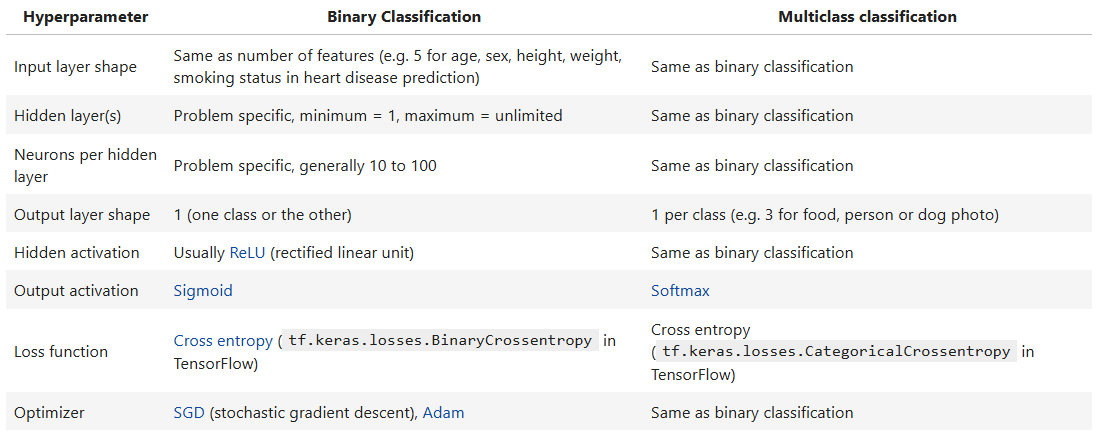

In [ ]:
from IPython.display import Image
image_path = '/content/Screenshot 2025-01-17 155753.png'
display(Image(filename=image_path))

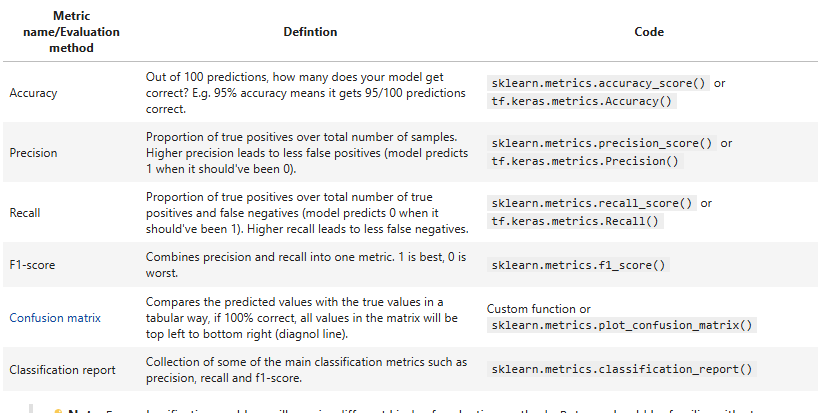

In [ ]:
from IPython.display import Image
img_path = "/content/Screenshot 2025-02-24 223208.png"
display(Image(filename = img_path))

<Figure size 3000x3000 with 0 Axes>

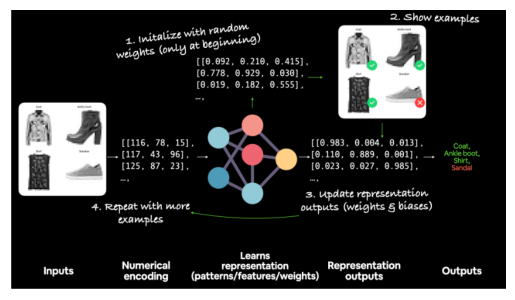

<Figure size 3000x3000 with 0 Axes>

In [140]:
plt.imshow(plt.imread("/content/Screenshot 2025-03-02 042354.png"))
plt.axis(False)
plt.figure(figsize=(30,30))

# Import imp libraries

In [1]:
import tensorflow as tf
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Example


In [ ]:
from sklearn.datasets import make_circles
#make set of 1000 examples
n_samples = 1000
#Create circles
X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


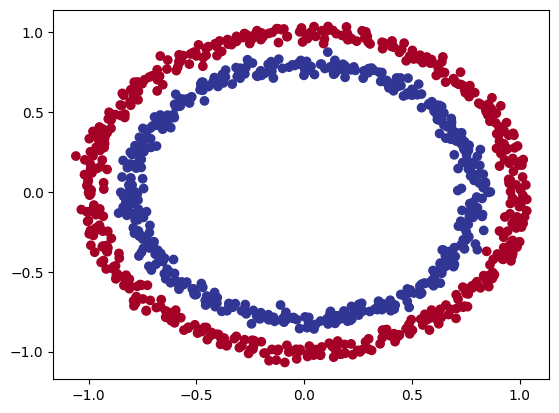

In [4]:
#Visualise with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c = y,cmap =plt.cm.RdYlBu)

### INPUT AND OUTPUT SHAPES

In [5]:
#Check the shapes  of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [6]:
#Size of samples
len(X),len(y)

(1000, 1000)

In [7]:
#View the first example of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps of modelling
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. Creating a model - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).
2. Compiling a model - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. Fitting a model - letting the model try to find patterns in the data (how does X get to y).

Let's see these in action using the Sequential API to build a model for our regression data. And then we'll step through each.

In [8]:
tf.random.set_seed(42)
#1.Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2.Compile it
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["accuracy"])
#3.fit it
model.fit(X,y,epochs = 200,verbose = 0)

#4.Evaluate it.
model.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

The accuracy is very low,its like the model is just guessing at this point.To solve this add extra layers.

In [9]:
#Set a seed
tf.random.set_seed(42)
#1.Create a model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
#2.Compile it
model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["accuracy"])
#3.fit it
model2.fit(X,y,epochs = 200,verbose = 0)

#4.Evaluate it.
model2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4824 - loss: 0.6934


[0.6933579444885254, 0.4790000021457672]

### Improving the model:-
1.Create a model:-


*   add more layers
*   increase number of hidden units within a layer.

2.Compile a model:-
*   choose a different optimization function (Adam or SGD)
3.Fitting a model:-


*   fit model for more epochs (leave it training for more time)








In [10]:
#Set a seed
tf.random.set_seed(42)
#1.Create a model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#2.Compile it
model3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])
#3.fit it
model3.fit(X,y,epochs = 100,verbose = 0)

#4.Evaluate it.
model3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5040 - loss: 0.6916


[0.6948251724243164, 0.4860000014305115]

# To visualise our model's prediction ,lets create a function
'plot_decision_boundary()'.this function will:
* take in training model,features(X) and labels(y)
* Create a meshgrid of the different X values.
* Make predictions across meshgrid.
* Plot the predictions as well as a line between zones(where each unique class fails)
* link for this :- made with ml github repo and can see multilayer perceptrons for tf

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # Define the range of x and y values
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Create a meshgrid for plotting
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Stack 2D arrays together to create input features
    x_in = np.c_[xx.ravel(), yy.ravel()]  # Shape: (10000, 2)

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class classification
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:  # Fix: Check output shape
        print("Doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, edgecolors="k")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary")
    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Doing binary classification


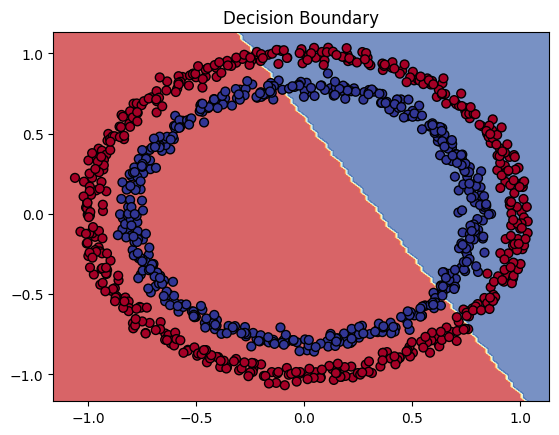

In [12]:
plot_decision_boundary(model3,X = X,y = y)

We compiled model for binary classification but this is regression problem


In [13]:
#Set a seed
tf.random.set_seed(42)
X_reg = tf.range(0,1000,5)
Y_reg = tf.range(100,1100,5) # y = x + 10
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
Y_reg_train = Y_reg[:150]
Y_reg_test = Y_reg[150:]


In [14]:
#Set seed
tf.random.set_seed(42)
#Create a model
model_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#Compile it
model_reg.compile(loss =tf.keras.losses.mae,
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["mae"])
#Fit it
model_reg.fit(tf.expand_dims(X_reg_train,-1),Y_reg_train,epochs = 100)
#Evaluate it
model_reg.evaluate(tf.expand_dims(X_reg_test,-1),Y_reg_test)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - loss: 458.2264 - mae: 458.2264
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 355.0419 - mae: 355.0419  
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 252.1455 - mae: 252.1455 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 147.2754 - mae: 147.2754 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51.7567 - mae: 51.7567 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.2424 - mae: 71.2424 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.9074 - mae: 74.9074 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 50.6540 - mae: 50.6540 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44.7598 - mae: 44.7598 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44.1642 - mae: 44.1642 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.1185 - mae: 42.1185 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43.4982 - mae: 43.4982 
Epoch 13/100
5/

[61.8820915222168, 61.8820915222168]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


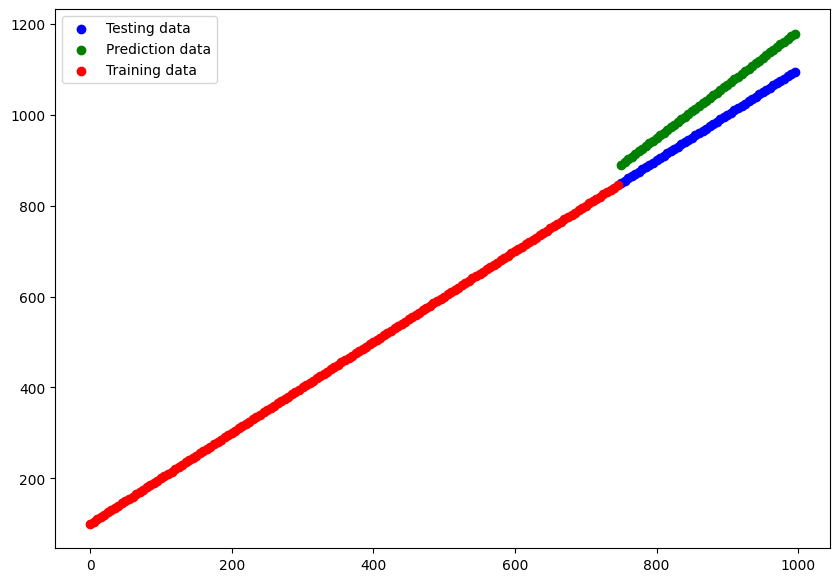

In [15]:
#Make predictions with our trained model
Y_pred_reg = model_reg.predict(tf.expand_dims(X_reg_test,-1))
#Plot model's prediciton vs data
plt.figure(figsize = (10,7))
plt.scatter(X_reg_test,Y_reg_test,c = "b",label = "Testing data")
plt.scatter(X_reg_test,Y_pred_reg,c = "g",label = "Prediction data")
plt.scatter(X_reg_train,Y_reg_train,c = 'r',label = "Training data")
plt.legend()
plt.show()

# Some practice models

In [16]:
#Set a seed
tf.random.set_seed(42)
#1.Create a model
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation ="relu"),
    tf.keras.layers.Dense(10,activation ="relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])
#2.Compile it
model4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["accuracy"])
#3.fit it
model4.fit(X,y,epochs = 200,verbose = 0)

#4.Evaluate it.
model4.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6247 - loss: 0.6640


[0.6526256799697876, 0.6610000133514404]

In [17]:
#Set a seed
tf.random.set_seed(42)
#1.Create a model
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation ="relu"),
    tf.keras.layers.Dense(10,activation ="relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])
#2.Compile it
model5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["accuracy"])
#3.fit it
model5.fit(X,y,epochs = 200,verbose = 0)

#4.Evaluate it.
model5.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 3.9007e-04


[0.00035705778282135725, 1.0]

In [18]:
#Set a seed
tf.random.set_seed(42)
#1.Create a model
model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation ="relu"),
    tf.keras.layers.Dense(10,activation ="relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])
#2.Compile it
model6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ["accuracy"])
#3.fit it
model6.fit(X,y,epochs = 200,verbose = 0)

#4.Evaluate it.
model6.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0062


[0.00594358891248703, 1.0]

# NON-Linearity

In [19]:
#LINEAR EXAMPLE
#Set seed
tf.random.set_seed(42)
#Create a model
model_nonlinear = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation = tf.keras.activations.linear,input_shape=(2,))
])
#Compile it.
model_nonlinear.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                        metrics = ["accuracy"])
#Fit it
model_nonlinear.fit(X,y,epochs = 100)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5221 - loss: 6.4004
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5266 - loss: 6.3978
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5260 - loss: 6.3967
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5261 - loss: 6.3951
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5209 - loss: 6.3955
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5209 - loss: 6.3816
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5209 - loss: 6.3814
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5209 - loss: 6.3813
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5209 - loss: 6.3808
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5209 - loss: 6.3794
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5209 - loss: 6.3584
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

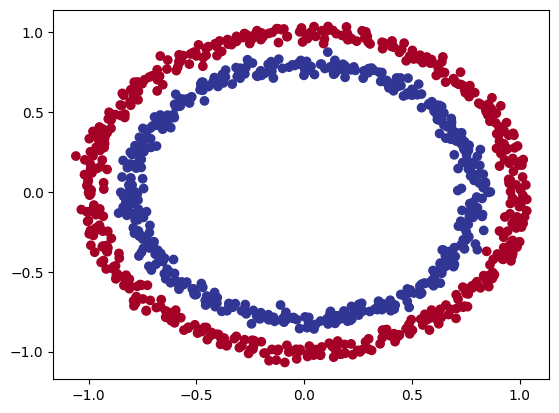

In [20]:
#Check our data
plt.scatter(X[:,0],X[:,1],c = y,cmap = plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Doing binary classification


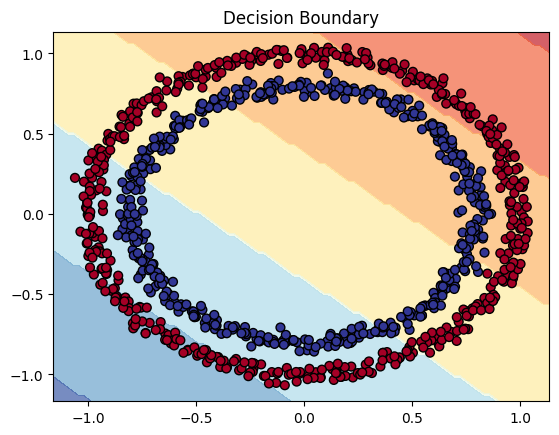

In [21]:
plot_decision_boundary(model_nonlinear,X,y)

In [22]:
#NON-LINEAR EXAMPLE (RelU):-
#Set a seed
tf.random.set_seed(42)
#Create a model
model_relu = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation = tf.keras.activations.relu,input_shape=(2,))
])
#Compile it
model_relu.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                   optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                   metrics = ["accuracy"])
#Fit it.
history = model_relu.fit(X,y,epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4770 - loss: 4.8978
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4540 - loss: 4.6569
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4324 - loss: 4.5115
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4229 - loss: 4.4674
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4147 - loss: 4.4205
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4105 - loss: 4.4092
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4054 - loss: 4.3554
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3998 - loss: 4.2212
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3944 - loss: 4.1055
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3975 - loss: 3.9762
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4080 - loss: 3.9364
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [23]:
#Time to replicate multi-layer nn from tf playground in code
#Set seed
tf.random.set_seed(42)
#Create a model
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation ="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
    ]
    )
#compile it
model_tf.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics = ["accuracy"])
#Fit it
model_tf.fit(X,y,epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4830 - loss: 5.5554
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 4.3555
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 4.0594
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 3.6514
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4811 - loss: 3.2196
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4697 - loss: 2.5533
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4718 - loss: 1.2690
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4758 - loss: 0.8771
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4756 - loss: 0.8470
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4744 - loss: 0.8293
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4707 - loss: 0.8157
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [24]:
model_tf.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9173 - loss: 0.4880


[0.4859938323497772, 0.9269999861717224]

In [25]:
#Time to replicate multi-layer nn from tf playground in code
#Set seed
tf.random.set_seed(42)
#Create a model
model_tf_better = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation ="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
    ]
    )
#compile it
model_tf_better.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics = ["accuracy"])
#Fit it
model_tf_better.fit(X,y,epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4957 - loss: 0.7414
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4775 - loss: 0.7272
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4160 - loss: 0.7191
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4707 - loss: 0.7139
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4769 - loss: 0.7095
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4787 - loss: 0.7053
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4788 - loss: 0.7033
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4859 - loss: 0.7017
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4791 - loss: 0.7004
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4734 - loss: 0.6992
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4555 - loss: 0.6980
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [ ]:
model_tf_better.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5251 - loss: 0.6773


[0.6737993359565735, 0.5350000262260437]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


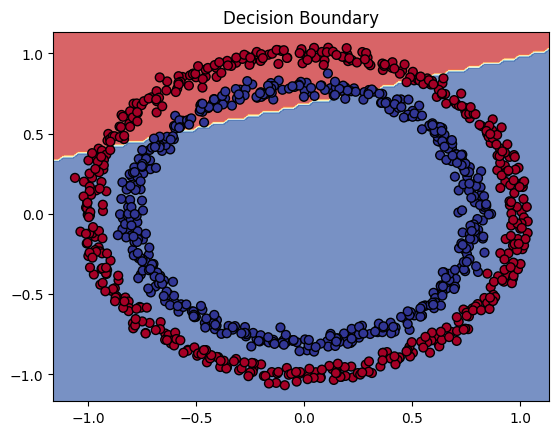

In [ ]:
plot_decision_boundary(model_tf_better,X,y)

Question: What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Note: The combination of linear (straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural networks.

In [ ]:
#TOY TENSOR(Similar to data we passed into our model)
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

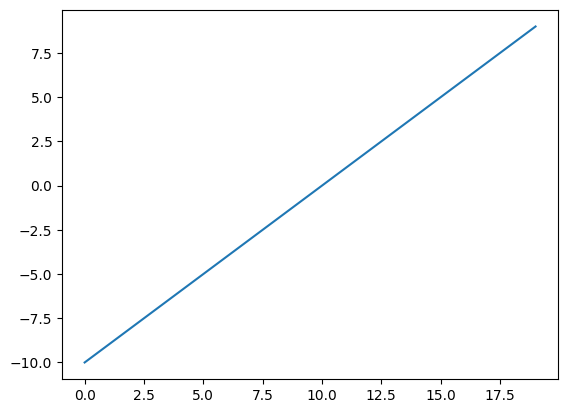

In [ ]:
#Visualise our toy tensor
plt.plot(A)

In [ ]:
#Lets start by replicating sigmoid- 1/(1+e^(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))


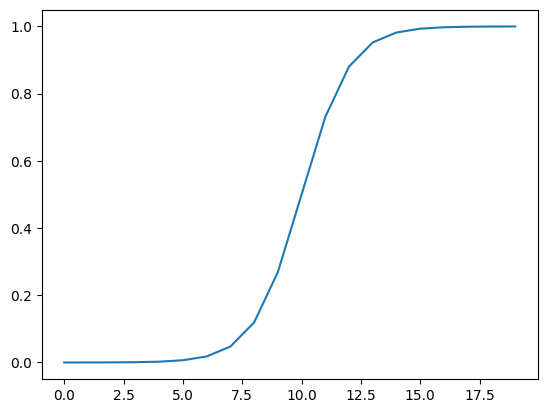

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
def relu(x):
  #return tf.keras.activations.relu(x)
  return tf.maximum(0,x)

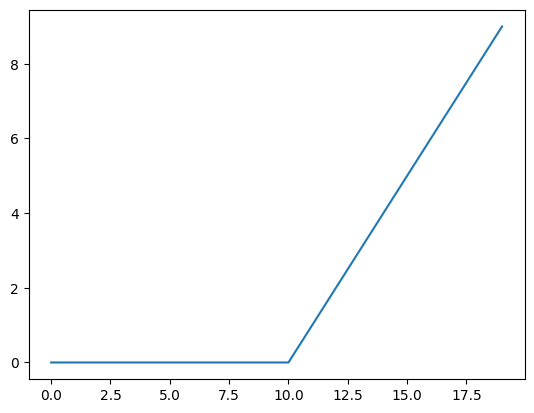

In [ ]:
plt.plot(relu(A))

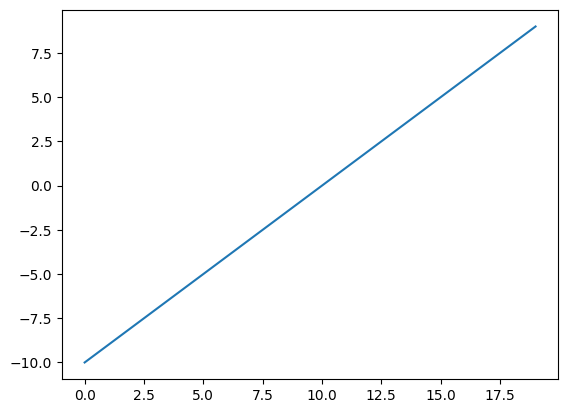

In [ ]:
def linear(x):
  return tf.keras.activations.linear(x)
plt.plot(linear(A))

In [ ]:
A==tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Refer ml-cheatsheets.readthedocs for more info

Linear-returns same

Sigmoid - 1/(1+e^(-x))

relu - max(x,0) [returns 0 for negative rest positive]


# Evaluating and improving our classification
till now we divided our dataset in 2 parts -training and testing
now we divide it in 3 parts ie -
1. training set
2. validation set - to check the performance of model
3. testing set

In [ ]:
len(X)


1000

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
#SPLIT IT IN Train and test
X_train,X_test,y_train,y_test = X[:800],X[800:],y[:800],y[800:]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
#Lets recreate a model to fit on the training data and evaluate on the testing data
#Set random seed
tf.random.set_seed(42)
#1. Create the model same(same as model_tf_better)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])
#2.Compile it
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["accuracy"])
#3.Fit it
history=model_8.fit(X_train,y_train,epochs = 15)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4691 - loss: 0.6975
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4382 - loss: 0.6943
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4961 - loss: 0.6931 
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4979 - loss: 0.6928
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5091 - loss: 0.6923
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5079 - loss: 0.6904 
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5002 - loss: 0.6895 
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5468 - loss: 0.6851
Epoch 9/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6211 - loss: 0.6638 
Epoch 10/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6685 - loss: 0.6357
Epoch 11/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7625 - loss: 0.5935 
Epoch 12/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8244

In [ ]:
model_8.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9736 - loss: 0.3102


[0.2978999614715576, 0.9750000238418579]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


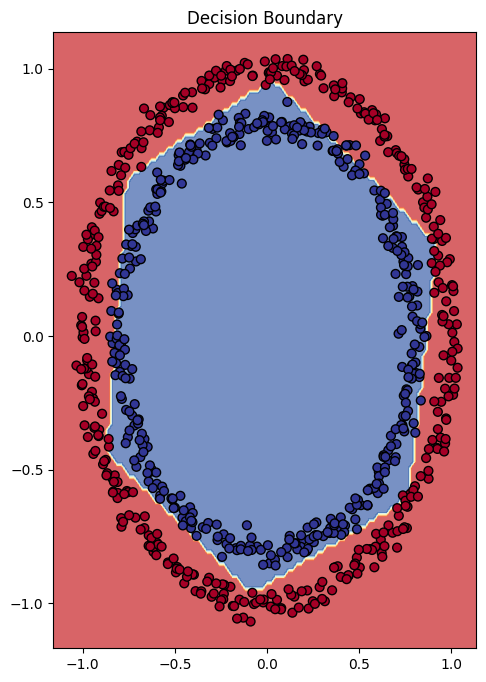

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


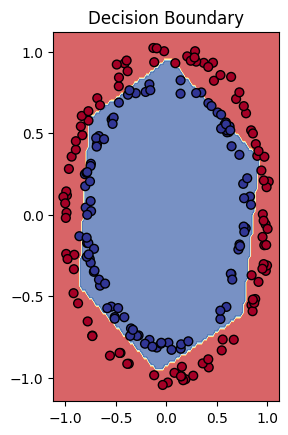

In [ ]:
#Plot decision boundaries for training and test sets
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_8,X_test,y_test)
plt.show()

#Plot the loss(or training) curve

In [ ]:
history.history

{'accuracy': [0.45625001192092896,
  0.45124998688697815,
  0.48750001192092896,
  0.5037500262260437,
  0.5112500190734863,
  0.5224999785423279,
  0.5375000238418579,
  0.5899999737739563,
  0.6424999833106995,
  0.6974999904632568,
  0.7799999713897705,
  0.8287500143051147,
  0.8700000047683716,
  0.9237499833106995,
  0.949999988079071],
 'loss': [0.6958729028701782,
  0.6939381957054138,
  0.693127453327179,
  0.6928609609603882,
  0.6922422051429749,
  0.6889255046844482,
  0.6848199367523193,
  0.6758070588111877,
  0.6552980542182922,
  0.6250597238540649,
  0.5844837427139282,
  0.5361625552177429,
  0.47938278317451477,
  0.4096124768257141,
  0.3366967737674713]}

In [ ]:
import pandas as pd
df = pd.DataFrame(history.history)
df

,accuracy,loss
0,0.45625,0.695873
1,0.45125,0.693938
2,0.48750,0.693127
3,0.50375,0.692861
4,0.51125,0.692242
5,0.52250,0.688926
6,0.53750,0.684820
7,0.59000,0.675807
8,0.64250,0.655298
9,0.69750,0.625060


Text(0, 0.5, 'percent (%)')

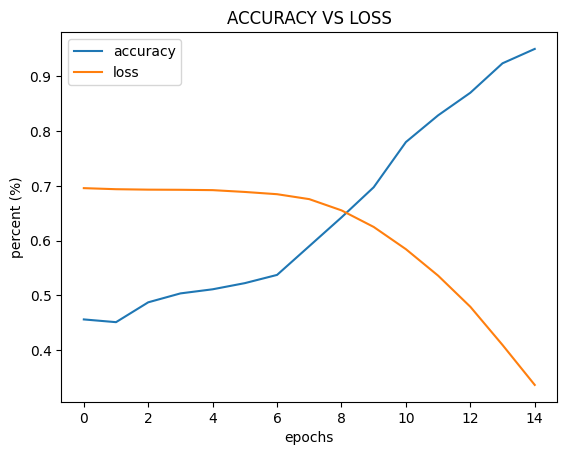

In [ ]:
df.plot()
plt.title("ACCURACY VS LOSS")
plt.xlabel("epochs")
plt.ylabel("percent (%)")

# Finding the best learning rate
To find the ideal learning rate(the lr where loss function decreases the most during training.)

Steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality you can add to your model while you are training.

* Another model(we could use same as above,but we are practicing building models here)
* A modified loss curves plot.


# My attempt to find it without using callback(Very slow)


In [ ]:
def best_lr(x):
  #set a random seed
  tf.random.set_seed(42)
  #create a model
  model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
  ])
  #compile it
  model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate= x),
                metrics = ["accuracy"])
  #fit it
  history = model_9.fit(X_train,y_train,epochs = 25,verbose = 0)
  #accuracy check
  acc = model_9.evaluate(X_test,y_test)[1]
  return acc,history


In [ ]:
lr = []
acc = []
loss = []
for i in range(1,100):
  lr.append(i/1000)
  acc.append(best_lr(i/1000)[0])
  loss.append(best_lr(i/1000)[1].history["loss"][-1])
df = pd.DataFrame({"lr":lr,"acc":acc})
df1 = pd.DataFrame({"lr":lr,"loss":loss})
print(df)
print(df1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6435 - loss: 0.6613
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5184 - loss: 0.6794
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7268 - loss: 0.5869
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7921 - loss: 0.5573
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4460 - loss: 0.6948
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7582 - loss: 0.5429


KeyboardInterrupt: 

In [ ]:
df.plot()
plt.title("Accuracy vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
df1.plot()
plt.title("Loss vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [ ]:
i = np.argmin(loss)
i,lr[i],acc[i],loss[i]

In [ ]:
i = np.argmax(acc)
i,lr[i],acc[i],loss[i]

# Using callback

In [ ]:
#set a random seed
tf.random.set_seed(42)
#create a model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation = "relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1,activation = "sigmoid")
])
#compile it
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])
#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))
#fit it
history_10 = model_10.fit(X_train,y_train,epochs = 100,callbacks=[lr_scheduler])
#accuracy check
model_10.evaluate(X_test,y_test)[1]

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5000 - loss: 0.7068 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4857 - loss: 0.7058 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4910 - loss: 0.7048 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4915 - loss: 0.7037 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5030 - loss: 0.7025 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5076 - loss: 0.7013 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5151 - loss: 0.7001 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5145 - loss: 0.6988 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5092 - loss: 0.6975 - learning_

0.4950000047683716

Text(0.5, 0, 'epochs')

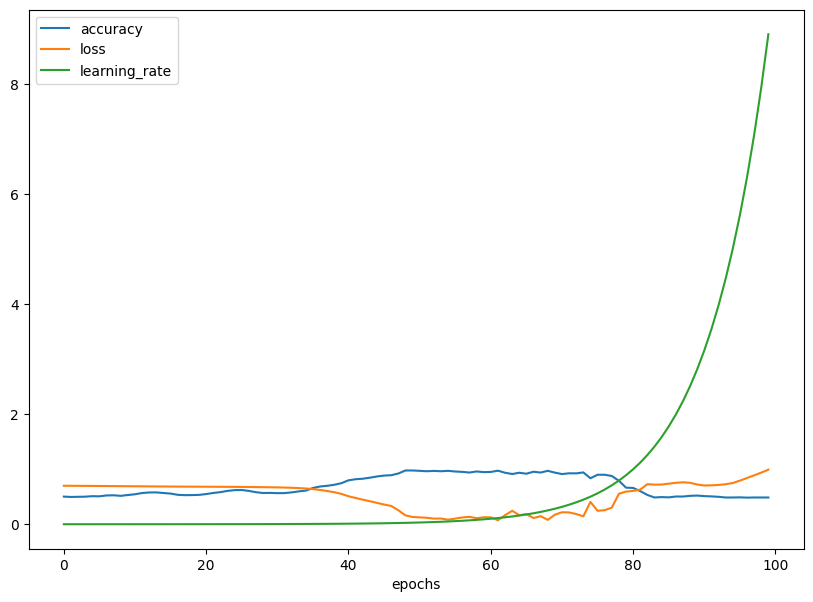

In [ ]:
pd.DataFrame(history_10.history).plot(figsize = (10,7))
plt.xlabel("epochs")

Text(0.5, 1.0, 'Learning Rate vs Loss')

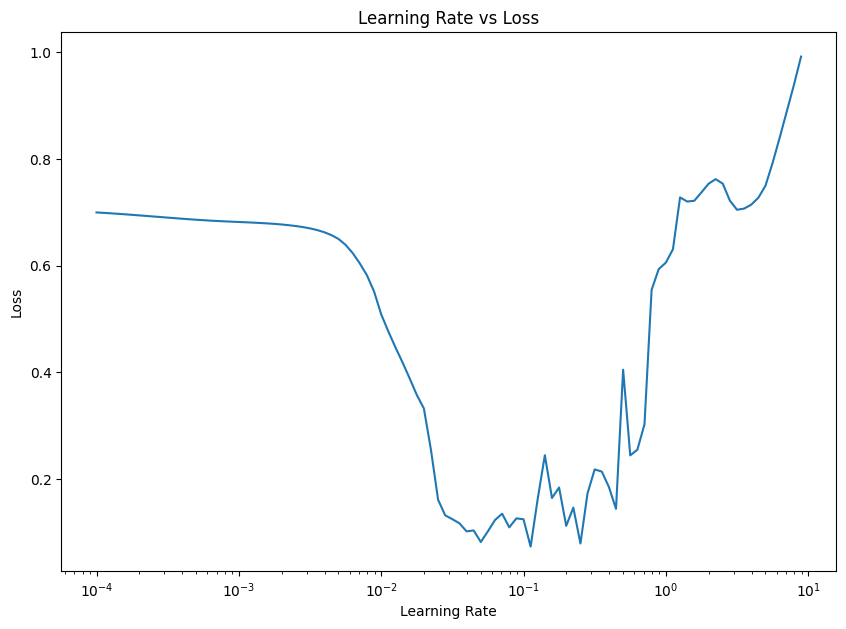

In [ ]:
#Plot the learning rate vs the loss
l = (tf.range(100)/20)
lrs = 1e-4*(10**l)
plt.figure(figsize = (10,7))
plt.semilogx(lrs,history_10.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [ ]:
i = np.argmin(history_10.history["loss"])
print(i)
print(lrs[i])
print(history_10.history["loss"][i])
print(history_10.history["accuracy"][i])

55
tf.Tensor(0.056234132519034905, shape=(), dtype=float64)
0.32717007398605347
0.8725000023841858


In [ ]:
# FROM THE LOWEST POINT IN CURVE, THE BEST LR IS REDUCED POINT /10

In [ ]:
#Lets find higher "ideal" lr with same model
#Set random seed
tf.random.set_seed(42)
#Create a model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])
#Compile it with ideal lr
model_11.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.03),
                 metrics = ["accuracy"])
#Fit it
model_11.fit(X_train,y_train,epochs = 100)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4415 - loss: 0.6997
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5316 - loss: 0.6895
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5576 - loss: 0.6832
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5461 - loss: 0.6771
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5428 - loss: 0.6738
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5698 - loss: 0.6654
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5846 - loss: 0.6583
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6005 - loss: 0.6422
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6128 - loss: 0.6311
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6198 - loss: 0.6245
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6240 - loss: 0.6202
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [ ]:
hist = model_11.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6449 - loss: 0.5856


In [ ]:
model_8.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9981 - loss: 0.0730 


[0.07010115683078766, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Doing binary classification


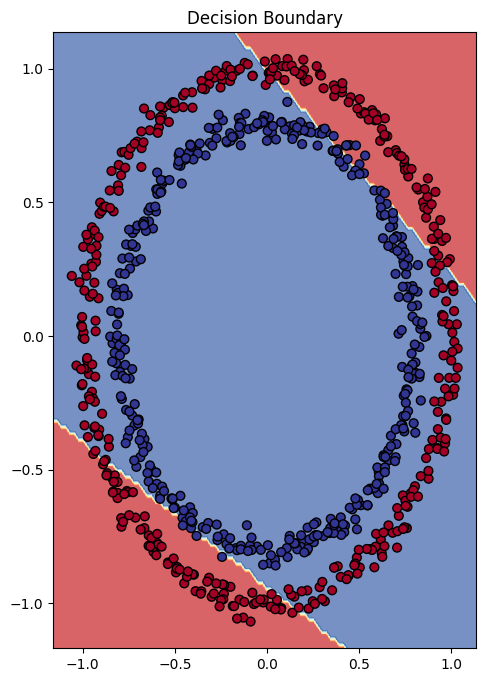

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Doing binary classification


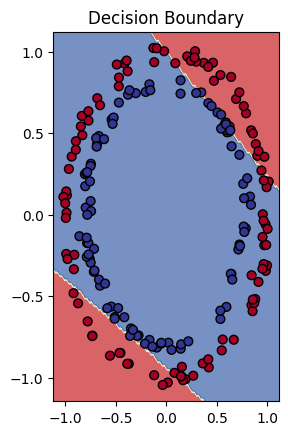

In [ ]:
#Plot decision boundaries for training and test sets
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_11,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_11,X_test,y_test)
plt.show()

## More classification eval methods
Alongside visualizing our models results as much as possible,there are a handful of other classification eval methods & metrics you should be familiar with
* Accuracy
* Precision
* Recall
* F1-score (mix of precision and recall)
* confusion_matrix
* classification report (sklearn)

In [ ]:
#Check accuracy of our model
loss,accuracy = model_11.evaluate(X_test,y_test)
print(f"loss: {loss}, accuracy: {(accuracy*100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6449 - loss: 0.5856 
loss: 0.5844570398330688, accuracy: 62.50%


# Confusion matrix
y_preds gives probability not binary values so we need to round it off to make confusion matrix possible

In [ ]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix
#Make predictions
y_preds = model_11.predict(X_test)
y_preds = tf.round(y_preds)
#confusion matrix
cm = confusion_matrix(y_test,y_preds)
cm

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[35, 66],
       [ 9, 90]])

# Make cm prettier

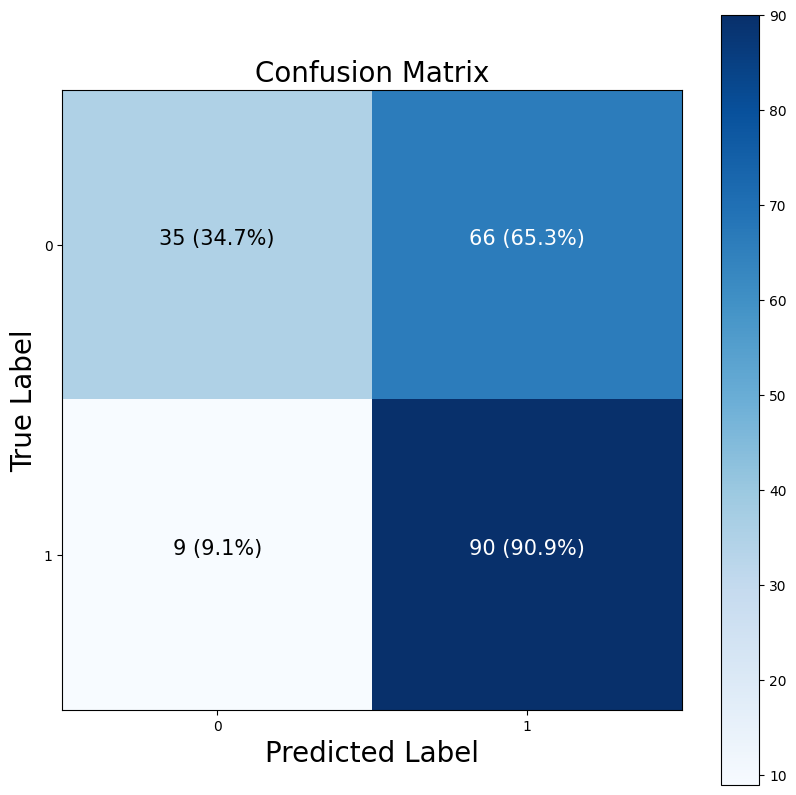

In [ ]:
import itertools
figsize = (10,10)

#Create the confusion matrix
cm  = confusion_matrix(y_test,y_preds)
cm_norms = cm.astype("float")/cm.sum(axis = 1)[:,np.newaxis] #Normalise confusion matrix
n_classes = cm.shape[0]

#Let's pretify it
fig,ax = plt.subplots(figsize = figsize)

#Create a matrix plot
cax = ax.matshow(cm,cmap = plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes = False
if classes:
  labels = classes
else :
  labels = np.arange(cm.shape[0])

#Label the axes
ax.set(title = "Confusion Matrix",
       xlabel = "Predicted Label",
       ylabel = "True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#Set threshold for different colors
threshold = (cm.max()+cm.min())/2

#Plot the text on each cell

for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norms[i,j]*100:.1f}%)",
           horizontalalignment = "center",
           color = "white" if cm[i,j] > threshold else "black",
           size = 15)



In [ ]:
cm_norms

array([[0.34653465, 0.65346535],
       [0.09090909, 0.90909091]])

In [ ]:
cm.shape[0]

2

# Working with a larger example (multi-class classification)
When you have more than 2 classes as an option, its known as **multi-class classification**.
* this means if you have 3 different classes it is multi-class classification.
* this also means if you have 100 different classes it is multi-class classification.

To practice this we are gonna build a neural network to classify images of different items of clothing.

In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#Data is already sorted in training and testing set
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()


In [3]:
#Show the first training example
print(f"Training example labels:\n{train_data[0]}\n")
print(f"Training example:\n{train_labels[0]}")

Training example labels:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0  

In [4]:
#Check shape of single example
train_data[0].shape,train_labels[0].shape,test_data[0],train_data[0].shape

((28, 28),
 (),
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  

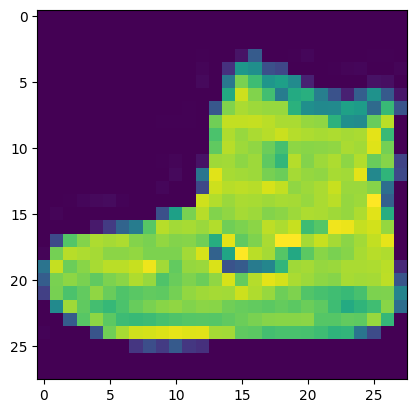

In [5]:
# Plot a single sample
plt.imshow(train_data[0])
plt.show()

In [6]:
#Check our data's label
train_labels[7]

2

In [7]:
#Create a small list so we can index onto our training labels so they are human readable
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

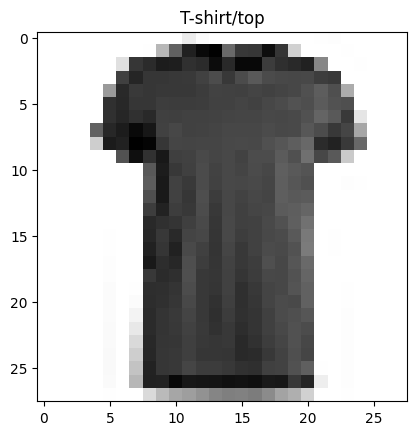

In [8]:
plt.imshow(train_data[17],cmap = plt.cm.binary)
plt.title(class_names[train_labels[17]])

Text(0.5, 1.0, 'Ankle boot')

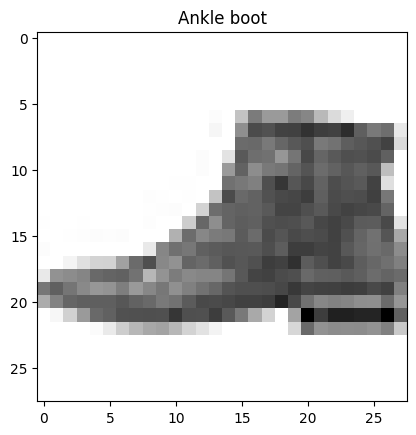

In [9]:
plt.imshow(train_data[1700],cmap = plt.cm.binary)
plt.title(class_names[train_labels[1700]])

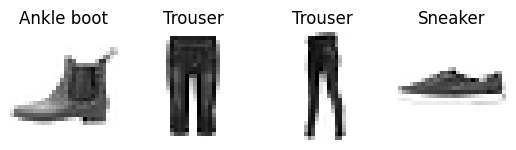

In [10]:
import random
for i in range(4):
  ax = plt.subplot(1,4,i+1)
  ind = random.randint(0,len(train_data))
  ax.imshow(train_data[ind],cmap = plt.cm.binary)
  ax.set_title(class_names[train_labels[ind]])
  plt.axis(False)


# Build a model for multiclass classification:
* input shape - check it by doing (train_data[0].shape) [here it is ( 28 , 28 ) ] - shape of one image
* output shape - 1 per class (here we have 10 classses of clothing so 10 output shape)
* Loss function - tf.keras.losses.CategoricalCrossentropy()[if data is one_hot_encoded]
* for not one_hot_encoded - use SparseCategoricalCrossentropy()
* output layer activation - softmax(not sigmoid)

In [11]:
train_data[0].shape

(28, 28)

In [12]:
#Our data need to be flattened(from 28*28 to 784)
flattened_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
])
flattened_model.output_shape

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 784)

In [13]:
tf.one_hot(train_labels[0:10],depth = 10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [14]:
#Set seed
tf.random.set_seed(42)
#create a model
model_m = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
#compile it
model_m.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])
#fit it
non_norm_hist = model_m.fit(train_data,train_labels,epochs = 10,validation_data = (test_data,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.0984 - loss: 2.9082 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 

In [15]:
#Set seed
tf.random.set_seed(42)
#create a model
model_m1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
#compile it
model_m1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])
#fit it
non_norm_hist1 = model_m1.fit(train_data,tf.one_hot(train_labels,depth=10),epochs = 10,validation_data = (test_data,tf.one_hot(test_labels,depth = 10)))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1192 - loss: 3.7510 - val_accuracy: 0.1864 - val_loss: 2.2868
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1558 - loss: 2.1876 - val_accuracy: 0.1893 - val_loss: 2.1840
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1671 - loss: 2.1189 - val_accuracy: 0.1839 - val_loss: 2.1363
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1822 - loss: 2.0841 - val_accuracy: 0.1984 - val_loss: 2.0459
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.2038 - loss: 1.9862 - val_accuracy: 0.2426 - val_loss: 1.8599
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.2391 - loss: 1.8136 - val_accuracy: 0.2235 - val_loss: 1.9216
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2785 - loss: 1.6931 - val_accuracy: 0.3041 - val_loss: 1.6731
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2990 - loss: 1.6312

In [16]:
#Check model summary-
model_m.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [17]:
model_m1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,862 (933.06 KB)

 Trainable params: 79,620 (311.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 159,242 (622.04 KB)

<Axes: >

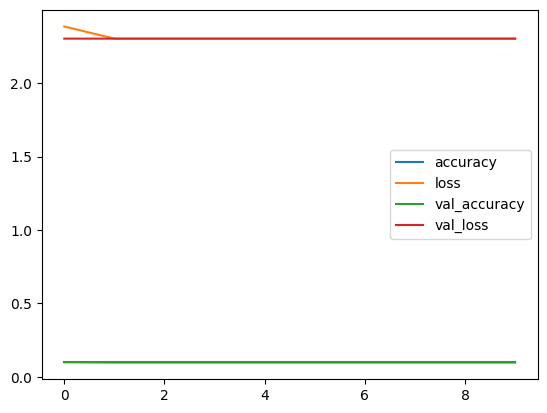

In [18]:
pd.DataFrame(non_norm_hist.history).plot()

<Axes: >

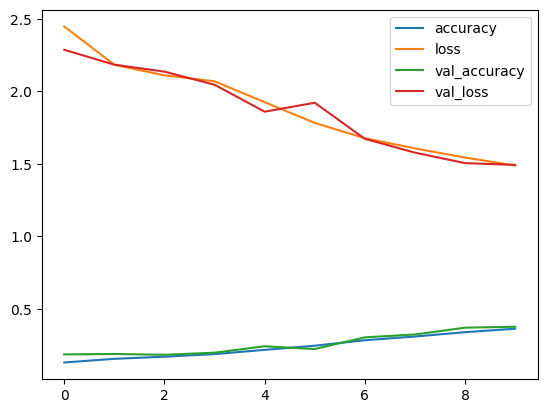

In [19]:
pd.DataFrame(non_norm_hist1.history).plot()

In [20]:
#Check min,max values of training data
train_data.min(),train_data.max()

(0, 255)

Neural Networks like data to be scaled or normalized meaning they want number between range of 0 & 1.

In [27]:
#We can get our training and testing data b/w 0&1 by dividing by maximum.
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [31]:
#Check min and max now
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [36]:
#Now data is normalised lets see its effects on model.
#Set seed
tf.random.set_seed(42)
#create a model
model_m_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
#compile it
model_m_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])
#fit it
norm_hist_2 = model_m_2.fit(train_data_norm,tf.one_hot(train_labels,depth=10),epochs = 10,validation_data = (test_data_norm,tf.one_hot(test_labels,depth = 10)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4399 - loss: 1.5943 - val_accuracy: 0.7192 - val_loss: 0.8923
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7407 - loss: 0.7873 - val_accuracy: 0.7667 - val_loss: 0.6622
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7810 - loss: 0.6350 - val_accuracy: 0.7799 - val_loss: 0.6267
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7901 - loss: 0.6038 - val_accuracy: 0.7902 - val_loss: 0.6089
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7987 - loss: 0.5843 - val_accuracy: 0.7958 - val_loss: 0.5970
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8031 - loss: 0.5704 - val_accuracy: 0.8005 - val_loss: 0.5889
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8082 - loss: 0.5607 - val_accuracy: 0.8039 - val_loss: 0.5830
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8111 - loss: 0.5528 - 

In [37]:
#Set seed
tf.random.set_seed(42)
#create a model
model_m_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
#compile it
model_m_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])
#fit it
norm_hist_3 = model_m_3.fit(train_data_norm,train_labels,epochs = 10,validation_data = (test_data_norm,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3283 - loss: 1.7302 - val_accuracy: 0.4609 - val_loss: 1.2458
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5518 - loss: 1.0863 - val_accuracy: 0.6483 - val_loss: 0.9101
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6458 - loss: 0.8859 - val_accuracy: 0.6986 - val_loss: 0.8371
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7049 - loss: 0.8022 - val_accuracy: 0.7504 - val_loss: 0.7239
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7586 - loss: 0.6931 - val_accuracy: 0.7637 - val_loss: 0.6899
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7701 - loss: 0.6559 - val_accuracy: 0.7696 - val_loss: 0.6686
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7765 - loss: 0.6322 - val_accuracy: 0.7722 - val_loss: 0.6535
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7818 - loss: 0.6148 - 

**Note**: Neural network tend to prefer data in numerical form as well as scaled/normalized(no b/w 0 & 1)

Text(0, 0.5, 'percent')

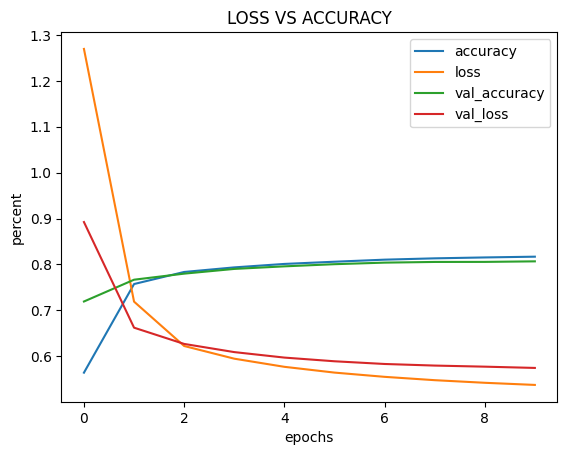

In [38]:
pd.DataFrame(norm_hist_2.history).plot()
plt.title("LOSS VS ACCURACY")
plt.xlabel("epochs")
plt.ylabel("percent")

Text(0, 0.5, 'percent')

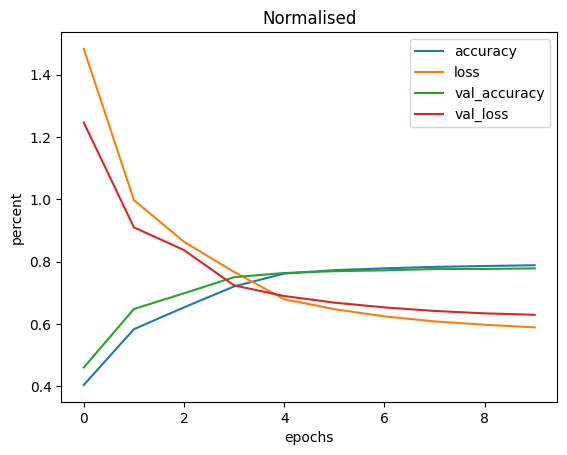

In [44]:
pd.DataFrame(norm_hist_3.history).plot()
plt.title("Normalised")
plt.xlabel("epochs")
plt.ylabel("percent")

Text(0, 0.5, 'percent')

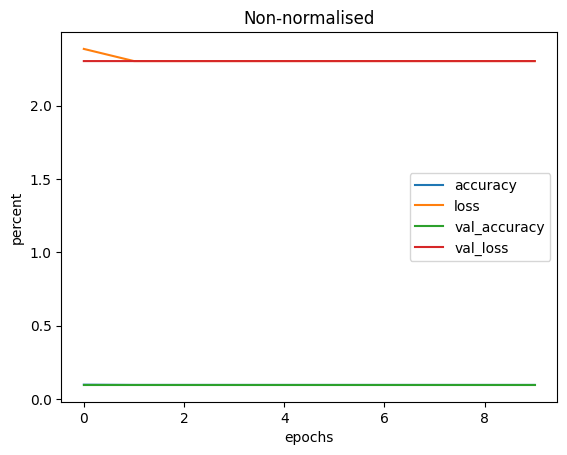

In [43]:
pd.DataFrame(non_norm_hist.history).plot()
plt.title("Non-normalised")
plt.xlabel("epochs")
plt.ylabel("percent")

**Note** - the same model with even *slightly* different data can yield different result.So to compare different models,their criteria must be same (same architecture but different data or same data but diff architecture)

## Finding perfect ideal learning rate

In [47]:
#Set random seed
tf.random.set_seed(42)

#create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax")
])

#Compile the model
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

#Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))

#Fit it
fit_lr_hist = model_13.fit(train_data_norm,
                           train_labels,
                           epochs = 40,
                           validation_data = (test_data_norm,test_labels),
                           callbacks = [lr_scheduler])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5012 - loss: 1.4482 - val_accuracy: 0.7742 - val_loss: 0.7376 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7841 - loss: 0.6762 - val_accuracy: 0.7951 - val_loss: 0.6242 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7987 - loss: 0.5998 - val_accuracy: 0.7978 - val_loss: 0.5973 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8035 - loss: 0.5753 - val_accuracy: 0.8021 - val_loss: 0.5872 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8070 - loss: 0.5618 - val_accuracy: 0.8001 - val_loss: 0.5834 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8102 - loss: 0.5527 - val_accuracy: 0.7996 - val_loss: 0.5812 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8123 - l

Text(0.5, 1.0, 'Ideal learning rate')

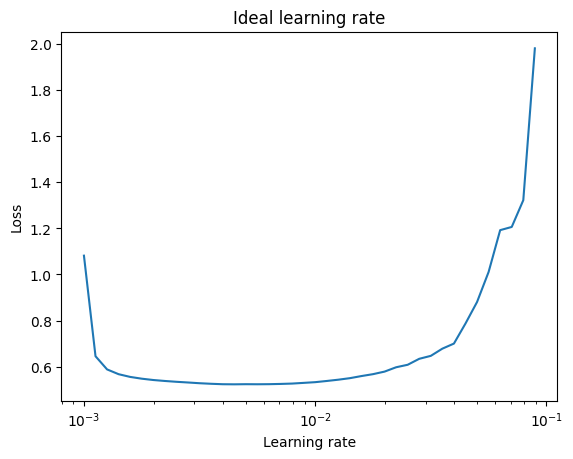

In [51]:
#PLOT THE LEARNING RATE DECAY CURVE
lrs = 1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,fit_lr_hist.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Ideal learning rate")

10*(lowest point in graph) is ideal learing rate.
here it is 10**(-3) = 0.001

In [57]:
#Let's refit the model for ideal learinig rate
#Set seed
tf.random.set_seed(42)

#Create a model
model_ideal = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax")
])

#Compile it
model_ideal.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                    metrics=["accuracy"])
#Fit it
ideal_hist = model_ideal.fit(
                            train_data_norm,
                            train_labels,
                            epochs = 10,
                            validation_data = (test_data_norm,test_labels)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3131 - loss: 1.6292 - val_accuracy: 0.6019 - val_loss: 1.0345
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6528 - loss: 0.9608 - val_accuracy: 0.7001 - val_loss: 0.8359
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7185 - loss: 0.7924 - val_accuracy: 0.7182 - val_loss: 0.7615
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7326 - loss: 0.7323 - val_accuracy: 0.7301 - val_loss: 0.7217
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7444 - loss: 0.6966 - val_accuracy: 0.7456 - val_loss: 0.7015
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7586 - loss: 0.6738 - val_accuracy: 0.7539 - val_loss: 0.6861
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7677 - loss: 0.6556 - val_accuracy: 0.7599 - val_loss: 0.6731
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7756 - loss: 0.6399 -

## Evaluating our multi-class classification model
* To evaluate its performance using other classification metrics (using confusion matrix)
* Assess some of its predictions(visualize)
* Improve its results (by training it for longer or changing its architecture)
* Save and export it for use in an application.

Let's go through top 2:-

In [60]:
#Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true,y_pred,classes = None,figsize = (10,10),text_size = 15,norm = False,cmap = plt.cm.Blues):
  #Create the confusion matrix
  cm  = confusion_matrix(y_true,y_pred)
  cm_norms = cm.astype("float")/cm.sum(axis = 1)[:,np.newaxis] #Normalise confusion matrix
  n_classes = cm.shape[0]

  #Let's pretify it
  fig,ax = plt.subplots(figsize = figsize)

  #Create a matrix plot
  cax = ax.matshow(cm,cmap = plt.cm.Blues)
  fig.colorbar(cax)

  #Set labels to be class names
  if classes:
    labels = classes
  else :
    labels = np.arange(cm.shape[0])

  #Label the axes
  ax.set(title = "Confusion Matrix",
        xlabel = "Predicted Label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #Set threshold for different colors
  threshold = (cm.max()+cm.min())/2

  #Plot the text on each cell

  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norms[i,j]*100:.1f}%)",
            horizontalalignment = "center",
            color = "white" if cm[i,j] > threshold else "black",
            size = text_size)



In [68]:
y_pred_ = model_ideal.predict(test_data_norm)
y_pred_ = y_pred_.argmax(axis=1)
y_pred_[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

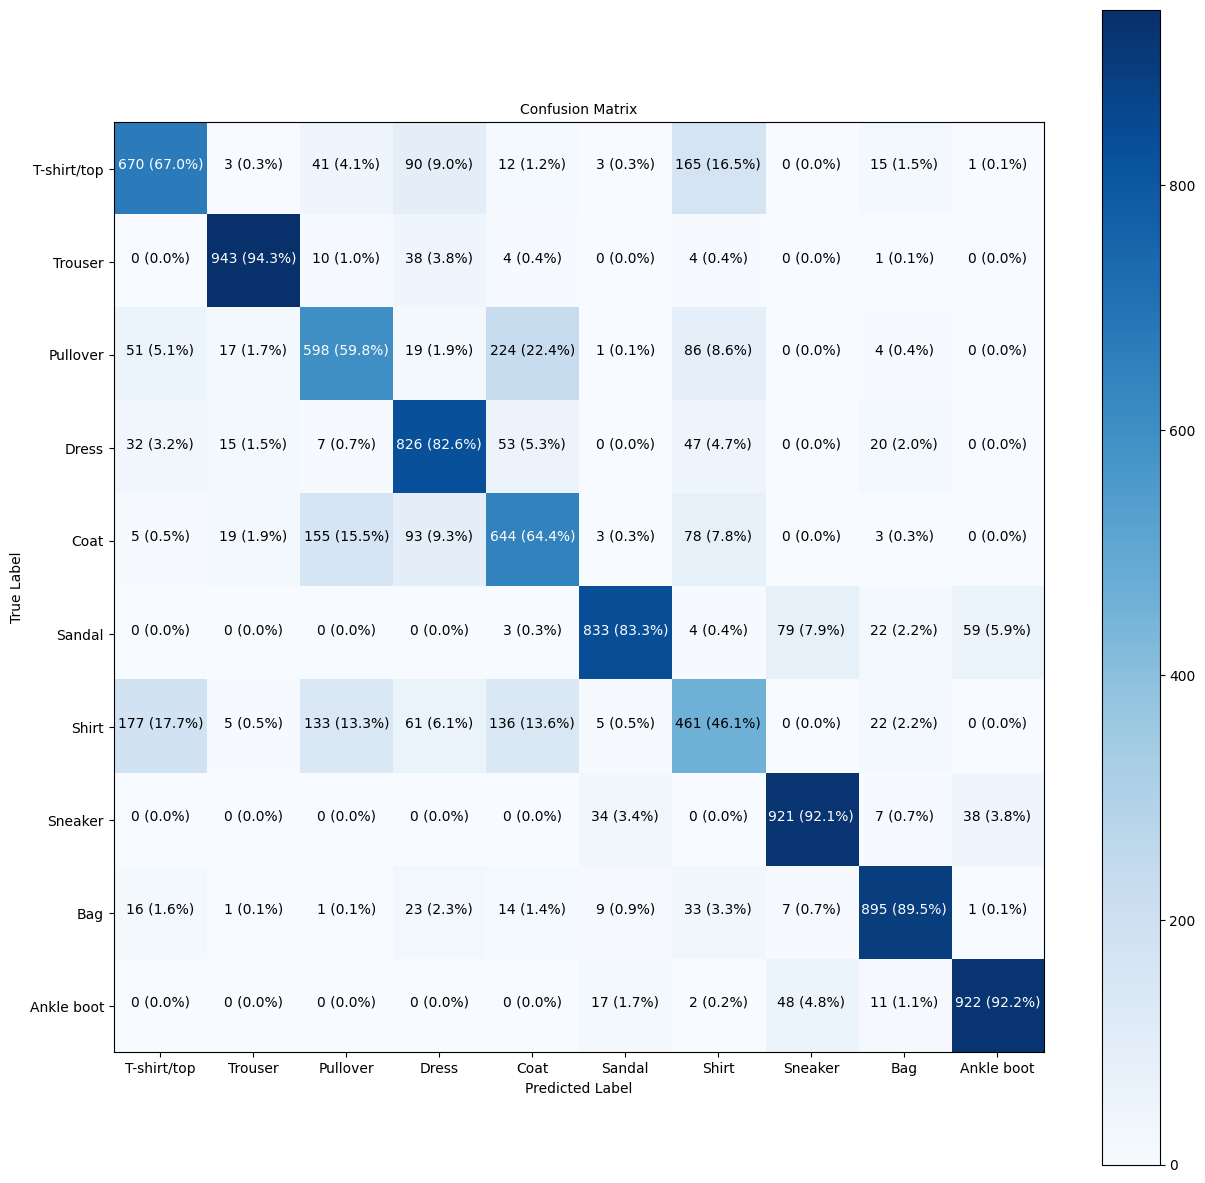

In [73]:
make_confusion_matrix(y_true = test_labels,
                      y_pred = y_pred_,
                      classes = class_names,
                      figsize = (15,15),
                      text_size = 10)

In [74]:
#Let's refit the model for ideal learinig rate
#Set seed
tf.random.set_seed(42)

#Create a model
model_ideal_btr = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax")
])

#Compile it
model_ideal_btr.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                    metrics=["accuracy"])
#Fit it
ideal_hist = model_ideal_btr.fit(
                            train_data_norm,
                            train_labels,
                            epochs = 10,
                            validation_data = (test_data_norm,test_labels)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7564 - loss: 0.7200 - val_accuracy: 0.8373 - val_loss: 0.4547
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8558 - loss: 0.4122 - val_accuracy: 0.8558 - val_loss: 0.4009
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8684 - loss: 0.3658 - val_accuracy: 0.8623 - val_loss: 0.3838
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8763 - loss: 0.3390 - val_accuracy: 0.8649 - val_loss: 0.3737
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8837 - loss: 0.3191 - val_accuracy: 0.8691 - val_loss: 0.3624
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8893 - loss: 0.3018 - val_accuracy: 0.8704 - val_loss: 0.3579
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8936 - loss: 0.2876 - val_accuracy: 0.8703 - val_loss: 0.3581
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8972 - loss: 0.2

In [75]:
y_pred_ = model_ideal_btr.predict(test_data_norm)
y_pred_ = y_pred_.argmax(axis=1)
y_pred_[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([9, 2, 1, 1, 0, 1, 4, 6, 5, 7])

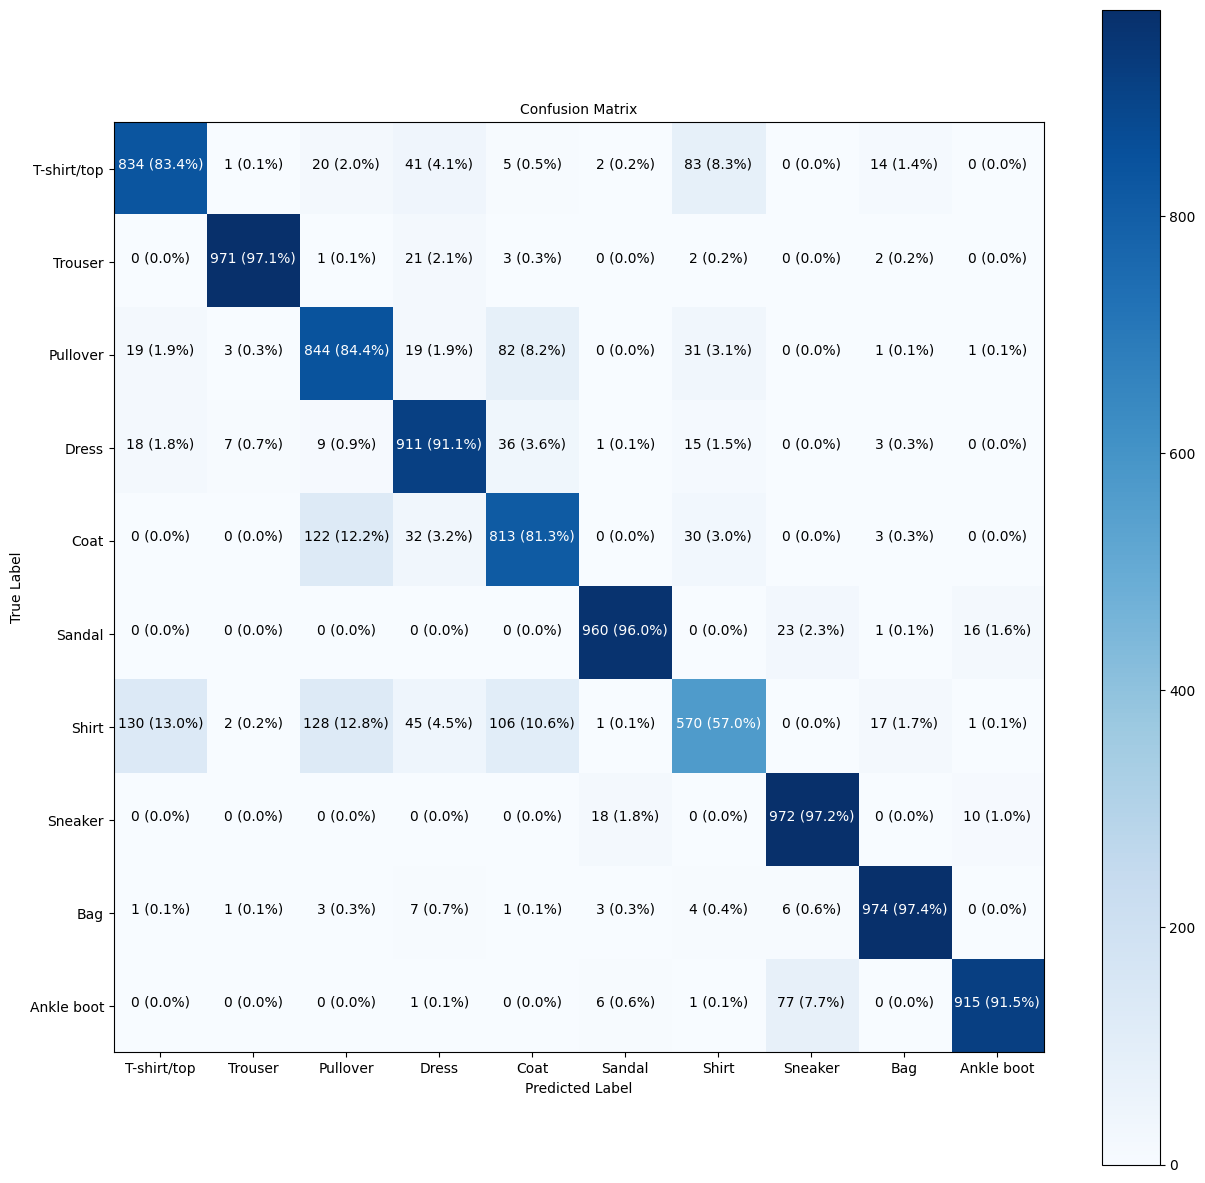

In [77]:
make_confusion_matrix(y_true = test_labels,
                      y_pred = y_pred_,
                      classes = class_names,
                      figsize = (15,15),
                      text_size = 10)

**Note** : Often when working with images and other forms of visual data,it's a good idea to visualise as much as possible to develop a further understanding of the data and the inputs and outputs of the data.

Create a plot to visualise.Must contain:-
* Plot a random image
* Make the prediction of said image
* Label the plot with the truth label and predicted label.

In [112]:
import random
import matplotlib.pyplot as plt

def plot_visualise(size,data,labels):
  i = random.randint(0,size-1)
  pred = model_ideal_btr.predict(data[i].reshape(1, 28, 28))
  pred = pred.argmax(axis = 1)
  pred_class = pred[0]
  plt.imshow(data[i],cmap = plt.cm.binary)
  plt.title(f"truth:{class_names[labels[i]]} vs pred:{class_names[pred_class]}")
  if class_names[labels[i]] == class_names[pred_class]:
    color = "green"
  else :
    color = "red"
  plt.xlabel(f"{class_names[labels[i]]},pred:{class_names[pred_class]}",color = color)
  plt.axis(False)
  plt.show()

In [113]:
data = np.concatenate((train_data_norm, test_data_norm))
labels = np.concatenate((train_labels, test_labels))
len(data),len(labels)

(70000, 70000)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


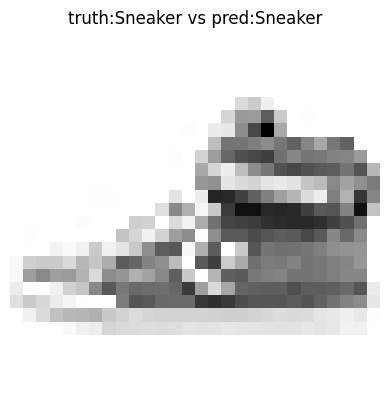

In [114]:
plot_visualise(len(data),data,labels)

In [120]:
# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (Correct: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


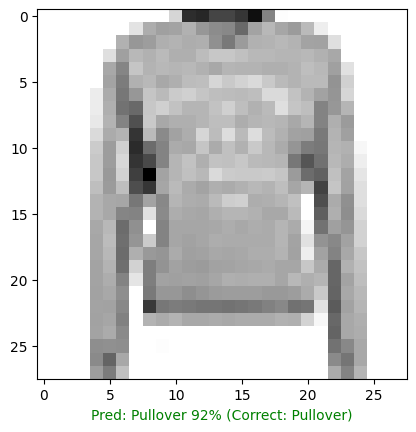

In [126]:
# Check out a random image as well as its prediction
plot_random_image(model=model_ideal_btr,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

# What patterns is our model learning ?


In [128]:
#Find the layers of our most recent model 1
model_ideal_btr.layers

[<Flatten name=flatten_13, built=True>,
 <Dense name=dense_42, built=True>,
 <Dense name=dense_43, built=True>,
 <Dense name=dense_44, built=True>]

In [129]:
#Extract a particular layer
model_ideal_btr.layers[1]

<Dense name=dense_42, built=True>

In [132]:
#Get the patterns of a layer in our network
weights,biases  = model_ideal_btr.layers[1].get_weights()

#Shapes
weights,weights.shape
# 784 is flattened shape of our input array and 100 is the neurons used here

(array([[-0.27111128,  0.02942506,  0.0589975 , ...,  0.01820777,
         -0.01744382, -0.18847714],
        [-0.2220677 , -0.06955583, -0.07480086, ..., -0.11196516,
          0.06865844, -0.04897107],
        [-0.40048346,  0.00065618,  0.0101344 , ..., -0.08707153,
         -0.05384722,  0.235797  ],
        ...,
        [-0.40999302,  0.03537253, -0.04037974, ...,  0.2795848 ,
          0.02773011, -0.09288239],
        [-0.48742974,  0.01969587,  0.02911068, ...,  0.28381377,
         -0.05865433, -0.1616962 ],
        [-0.09111164, -0.0201182 ,  0.05081835, ...,  0.07078896,
         -0.05897773, -0.1343622 ]], dtype=float32),
 (784, 100))

In [142]:
model_ideal_btr.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,862 (933.06 KB)

 Trainable params: 79,620 (311.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 159,242 (622.04 KB)

Check bias vector ...

In [147]:
#Bias and biases shapes
biases,biases.shape

(array([-0.31178346, -0.02304208, -0.01138121, -0.02868278,  0.1431529 ,
         0.16453625,  0.456793  , -0.02255354,  0.22573571,  0.32301852,
         0.4864159 ,  0.1433962 , -0.03191702, -0.0175707 ,  0.12009372,
        -0.0398926 , -0.16080503, -0.4893556 ,  0.06204912, -0.0224119 ,
         0.4057443 , -0.08692761, -0.5619061 ,  0.5009042 ,  0.29443952,
         0.02550096,  0.4268037 , -0.11718841,  0.41712055,  0.25615138,
        -0.1937879 ,  0.14939916,  0.606065  ,  0.2866163 ,  0.4527788 ,
        -0.02963312,  0.11177558,  0.14117031,  0.486908  ,  0.3342031 ,
         0.02343051,  0.5083235 ,  0.13429163,  0.4508136 ,  0.03134893,
         0.24091034, -0.03023137, -0.01991692,  0.00852555, -0.0231354 ,
         0.15327708,  0.6415921 ,  0.52640903,  0.56672966,  0.09707341,
         0.69424796,  0.88527495,  0.15365043, -0.3634139 ,  0.37985584,
        -0.03619885,  0.43761075, -0.0976928 , -0.29465348,  0.1160415 ,
         0.32710788,  0.05613159,  0.4261184 ,  0.4

For every nueron there is a bias vector. Each of these is paired with a weights matirix .

the weights gets initialised with random values and after fitting the model it gets desirable values.

the bias vector also gets initialised as zeroes (atleast in a case of tf Dense Layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

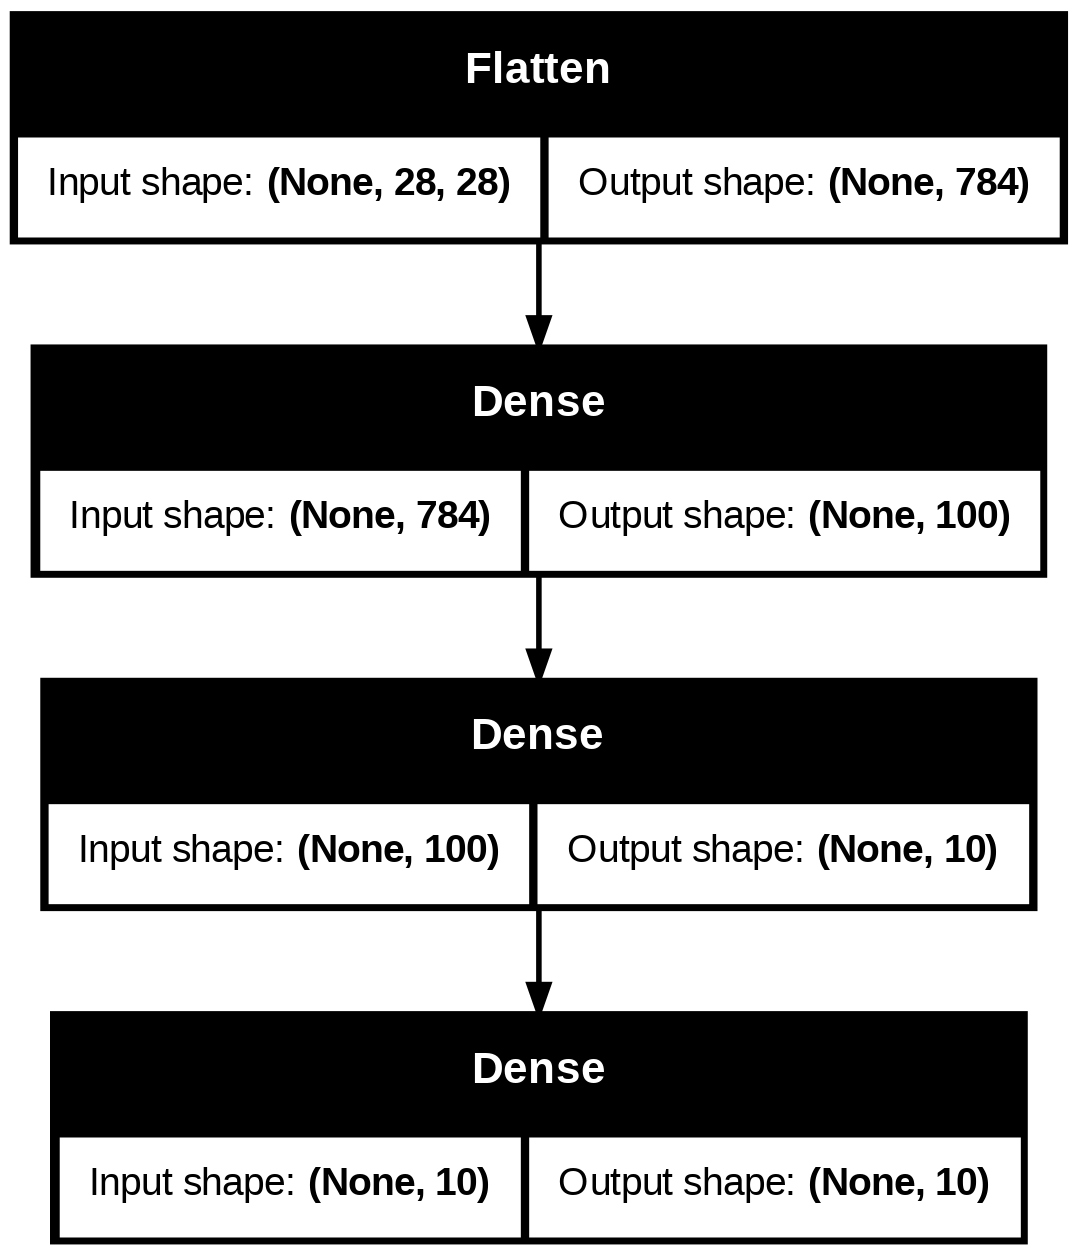

In [149]:
#Lets check another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
#See the inputs and outputs of each layer
plot_model(model_ideal_btr,show_shapes = True)